In [21]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../utils/")
# from res_processing_utils import get_ave_metric, running_mean
from res_processing_utils import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from plot_utils import save_csv, save_csv_only_y
from plot_utils import get_config_with_best_train_loss, get_config_with_best_test_acc
from plot_utils import plot_test_acc, plot_train_loss
from plot_utils import plot_best_config_multiple_epochs
from plot_utils import plot_best_config_fixed_epochs, plot_best_config_fixed_epochs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
top_directory = "/dfs/scratch0/zjian/floating_halp/exp_res/resnet_weight_loading_full_model_fine_tune_dec_11/"
pattern = "opt_sgd_momentum_0.0_lr_0.01_l2_reg_0.0005_"
train_loss = get_ave_metric(pattern, top_directory, seed_list=[1,], metric="train_loss")
test_loss = get_ave_metric(pattern, top_directory, seed_list=[1,], metric="test_loss")
test_acc = get_ave_metric(pattern, top_directory, seed_list=[1,], metric="test_acc")
grad_norm = get_ave_metric(pattern, top_directory, seed_list=[1,], metric="grad_norm")

In [23]:
train_loss.shape, test_loss.shape, test_acc.shape, grad_norm.shape

((39100,), (100,), (100,), (39100,))

In [24]:
train_loss[-1], test_loss[-1], test_acc[-1], grad_norm[-1]

(0.5211326452996582, 0.9425335839530453, 0.8784, 0.031141297092004954)

## overall report



['_bc-svrg', 'reg_0.0005']
best test acc and config  0.8863666666666666 90 opt_bc-svrg_momentum_0.0_lr_0.1_l2_reg_0.0005_


/home/ubuntu/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


best train loss and config  0.038043537987669546 91 opt_bc-svrg_momentum_0.0_lr_0.1_l2_reg_0.0005_


['_lp-svrg', 'reg_0.0005']
best test acc and config  0.8791666666666665 2 opt_lp-svrg_momentum_0.0_lr_1.0_l2_reg_0.0005_
best train loss and config  0.246145160437992 2 opt_lp-svrg_momentum_0.9_lr_0.1_l2_reg_0.0005_


['_svrg', 'reg_0.0005']
best test acc and config  0.8858 80 opt_svrg_momentum_0.0_lr_0.1_l2_reg_0.0005_
best train loss and config  0.031961389760732595 99 opt_svrg_momentum_0.9_lr_0.01_l2_reg_0.0005_


['_lp-sgd', 'reg_0.0005']
best test acc and config  0.8832333333333334 6 opt_lp-sgd_momentum_0.0_lr_1.0_l2_reg_0.0005_
best train loss and config  0.06732516919413892 6 opt_lp-sgd_momentum_0.9_lr_0.1_l2_reg_0.0005_


['_sgd', 'reg_0.0005']
best test acc and config  0.8864666666666666 99 opt_sgd_momentum_0.0_lr_0.1_l2_reg_0.0005_
best train loss and config  0.032042911954342015 99 opt_sgd_momentum_0.9_lr_0.01_l2_reg_0.0005_


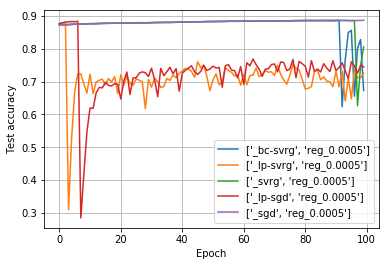

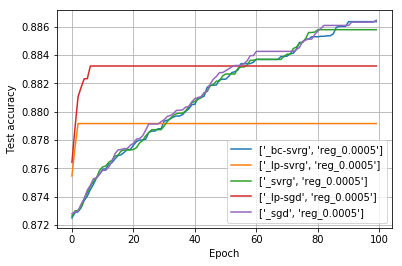

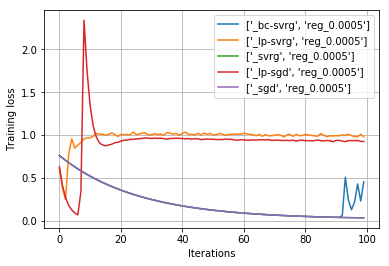

In [25]:
best_test_acc_list, best_train_loss_list, plot_label_list = \
plot_best_config_fixed_epochs(top_directory = "/dfs/scratch0/zjian/floating_halp/exp_res/resnet_weight_loading_full_model_fine_tune_dec_16_all/",
                              cut_off_epoch=100, 
                              total_epoch=100, 
                              win_width=1000, 
                              epoch_len=391,
                              seed_list=[1, 2, 3],
                              pattern_list_array=[["_bc-svrg", "reg_0.0005"],
                                                      ["_lp-svrg", "reg_0.0005"],
                                                      ["_svrg", "reg_0.0005"],
                                                      ["_lp-sgd", "reg_0.0005"],
                                                      ["_sgd", "reg_0.0005"]])

In [ ]:
# best_test_acc_list, best_train_loss_list, plot_label_list = \
# plot_best_config_fixed_epochs(top_directory = "/dfs/scratch0/zjian/floating_halp/exp_res/resnet_weight_loading_full_model_fine_tune_dec_11/",
#                               cut_off_epoch=100, 
#                               total_epoch=100, 
#                               win_width=1000, 
#                               epoch_len=391,
#                               seed_list=[1, 2, 3],
#                               pattern_list_array=[ ["_lp-svrg", "reg_0.0005", "momentum_0.9"],
#                                                       ["_svrg", "reg_0.0005", "momentum_0.9"],
#                                                       ["_lp-sgd", "reg_0.0005", "momentum_0.9"],
#                                                       ["_sgd", "reg_0.0005", "momentum_0.9"]])

In [31]:
plot_label_list = ["halp", "svrg (16)", "svrg (32)", "sgd (16)", "sgd (32)"]

In [32]:
data_list = [(name, np.arange(y.size) + 1, np.maximum.accumulate(y)) \
             for name, y in zip(plot_label_list, best_test_acc_list) \
            if name in save_list ]
save_csv_only_y(data_list, 
         file_name="./data/resnet_test_acc_all.csv")
data_list = [(name, np.arange(y.size) + 1, np.minimum.accumulate(y) ) \
             for name, y in zip(plot_label_list, best_train_loss_list) \
             if name in save_list ]
save_csv_only_y(data_list, 
         file_name="./data/resnet_train_loss_all.csv")

In [6]:
best_test_acc_list, best_train_loss_list, plot_label_list = \
plot_best_config_fixed_epochs(top_directory = "/dfs/scratch0/zjian/floating_halp/exp_res/resnet_weight_loading_fine_tune_dec_7/",
                              cut_off_epoch=100, 
                              total_epoch=100, 
                              win_width=1000, 
                              epoch_len=391,
                             seed_list=[1],
                             pattern_list_array=[ ["_bc-svrg", ], 
                                                      ["_lp-svrg", ],
                                                      ["_svrg", ],
                                                      ["_bc-sgd", ],
                                                      ["_lp-sgd", ],
                                                      ["_sgd", ]])



['_bc-svrg']
best test acc and config  0.8761 2 opt_bc-svrg_momentum_0.9_lr_0.1_l2_reg_1e-06_
best train loss and config  9.455247913175227e-05 99 opt_bc-svrg_momentum_0.9_lr_0.1_l2_reg_0.0_


['_lp-svrg']


KeyboardInterrupt: 

In [6]:
save_list = ["halp", "svrg (16)", "svrg (32)", "sgd (16)", "sgd (32)"]

In [7]:
data_list = [(name, np.arange(y.size) + 1, np.maximum.accumulate(y)) \
             for name, y in zip(plot_label_list, best_test_acc_list) \
            if name in save_list ]
save_csv_only_y(data_list, 
         file_name="./data/lenet_test_acc_all.csv")
data_list = [(name, np.arange(y.size) + 1, y) \
             for name, y in zip(plot_label_list, best_train_loss_list) \
             if name in save_list ]
save_csv_only_y(data_list, 
         file_name="./data/lenet_train_loss_all.csv")



['_bc-svrg'] 3
best test acc and config  0.5962999999999999 2 opt_bc-svrg_momentum_0.9_lr_0.01_l2_reg_0.0005_


/home/ubuntu/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


best train loss and config  1.180435325681744 2 opt_bc-svrg_momentum_0.9_lr_0.01_l2_reg_0.0005_


['_bc-svrg'] 5
best test acc and config  0.6233 4 opt_bc-svrg_momentum_0.9_lr_0.01_l2_reg_0.0005_
best train loss and config  0.9931002778278859 4 opt_bc-svrg_momentum_0.9_lr_0.01_l2_reg_0.0005_


['_bc-svrg'] 10
best test acc and config  0.6428666666666667 9 opt_bc-svrg_momentum_0.9_lr_0.01_l2_reg_0.0005_
best train loss and config  0.8049554291262093 9 opt_bc-svrg_momentum_0.9_lr_0.01_l2_reg_0.0005_


['_bc-svrg'] 15
best test acc and config  0.6440333333333333 13 opt_bc-svrg_momentum_0.9_lr_0.005_l2_reg_0.0005_
best train loss and config  0.7131202247954798 14 opt_bc-svrg_momentum_0.9_lr_0.01_l2_reg_0.0005_


['_bc-svrg'] 20
best test acc and config  0.6440333333333333 13 opt_bc-svrg_momentum_0.9_lr_0.005_l2_reg_0.0005_
best train loss and config  0.660800770260006 17 opt_bc-svrg_momentum_0.9_lr_0.01_l2_reg_0.0005_


['_bc-svrg'] 30
best test acc and config  0.6440333333333333 13 opt_bc

best test acc and config  0.6016666666666667 4 opt_sgd_momentum_0.9_lr_0.01_l2_reg_0.0005_
best train loss and config  1.1324208891557535 4 opt_sgd_momentum_0.9_lr_0.01_l2_reg_0.0005_


['_sgd'] 10
best test acc and config  0.6159666666666667 6 opt_sgd_momentum_0.9_lr_0.01_l2_reg_0.0005_
best train loss and config  0.9386085863307257 9 opt_sgd_momentum_0.9_lr_0.01_l2_reg_0.0005_


['_sgd'] 15
best test acc and config  0.6169666666666667 10 opt_sgd_momentum_0.9_lr_0.005_l2_reg_0.0005_
best train loss and config  0.8534603733998635 14 opt_sgd_momentum_0.9_lr_0.01_l2_reg_0.0005_


['_sgd'] 20
best test acc and config  0.6248333333333334 18 opt_sgd_momentum_0.9_lr_0.005_l2_reg_0.0005_
best train loss and config  0.7856079919301641 19 opt_sgd_momentum_0.9_lr_0.005_l2_reg_0.0005_


['_sgd'] 30
best test acc and config  0.6248333333333334 18 opt_sgd_momentum_0.9_lr_0.005_l2_reg_0.0005_
best train loss and config  0.6544884965676887 29 opt_sgd_momentum_0.0_lr_0.05_l2_reg_0.0005_


['_sgd'] 50


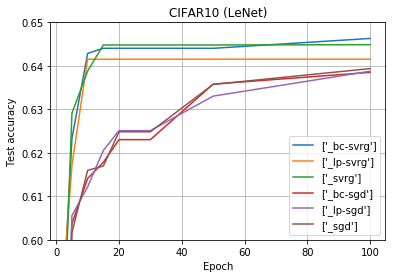

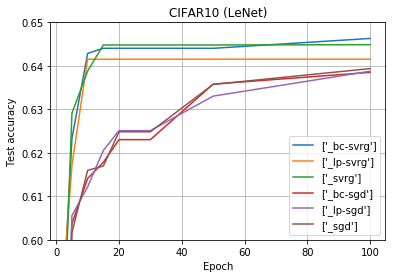

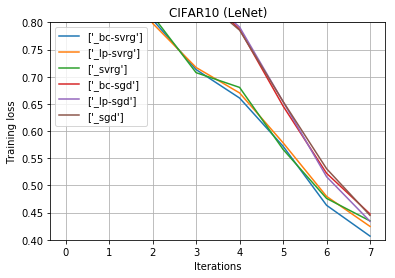

In [8]:
# ckpt_epochs = np.arange(10, 101, 30)
ckpt_epochs = np.array([3, 5, 10, 15, 20, 30, 50, 100])
_, best_train_loss_list, best_test_acc_list = \
plot_best_config_multiple_epochs(ckpt_epochs, total_epoch=100, 
                               win_width=1000, 
                               top_directory = "/dfs/scratch0/zjian/floating_halp/exp_res/lenet_hyper_sweep_2018_nov_17/", 
                               epoch_len=391)


In [9]:
data_list = [(name, ckpt_epochs, np.maximum.accumulate(y)) \
             for name, y in zip(plot_label_list, best_test_acc_list) \
            if name in save_list ]
save_csv_only_y(data_list, 
         file_name="./data/lenet_test_acc_all_temporal.csv")
data_list = [(name, ckpt_epochs, y) \
             for name, y in zip(plot_label_list, best_train_loss_list) \
            if name in save_list ]
save_csv_only_y(data_list, 
         file_name="./data/lenet_train_loss_all_temporal.csv")